# AS09 Tutorial: Display Chinese in Matplotlib (in Colab)

!!! This is not the answer of AS09, please modify it according to your needs !!!

Reference:

- [Using external fonts in Google Colaboratory ](https://buomsoo-kim.github.io/colab/2018/04/27/Using-External-fonts-in-colab.md/)

- [Custom fonts in Google Colaboratory matplotlib charts - Stack Overflow](https://stackoverflow.com/questions/51810908/custom-fonts-in-google-colaboratory-matplotlib-charts)

## Get sample data

In [1]:
!wget https://github.com/P4CSS/PSS/blob/master/data/yt-comment-antiELAB.xlsx?raw=true -O yt-comment-antiELAB.xlsx
!wget https://raw.githubusercontent.com/P4CSS/PSS/master/data/stopwords_zh-tw.txt -O stopwords_zh-tw.txt

--2021-05-30 09:55:01--  https://github.com/P4CSS/PSS/blob/master/data/yt-comment-antiELAB.xlsx?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/P4CSS/PSS/raw/master/data/yt-comment-antiELAB.xlsx [following]
--2021-05-30 09:55:01--  https://github.com/P4CSS/PSS/raw/master/data/yt-comment-antiELAB.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/P4CSS/PSS/master/data/yt-comment-antiELAB.xlsx [following]
--2021-05-30 09:55:01--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/yt-comment-antiELAB.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

In [2]:
import unicodedata # for removing Chinese puctuation

def remove_stopWords(words):
    out = []
    for word in words:
        if word not in stopwords:
            out.append(word)
    return out


def remove_punc_by_unicode(words):
    out = []
    for word in words:
        if word != " " and not unicodedata.category(word[0]).startswith('P'):
            out.append(word)
    return out

In [3]:
import pandas as pd
import jieba

with open("stopwords_zh-tw.txt", encoding="utf-8") as fin:
    stopwords = fin.read().split("\n")[1:]
    stopwords += ["\n"]

df = pd.read_excel('yt-comment-antiELAB.xlsx') 
df['token_text'] = df['textOriginal'].apply(lambda x:list(jieba.cut(x)))
df['cleaned'] = df['token_text'].apply(remove_stopWords)
df['cleaned'] = df['cleaned'].apply(remove_punc_by_unicode)

df.head(5)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.025 seconds.
Prefix dict has been built successfully.


,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,token_text,cleaned
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[鄭, 大哥, 和, 吉雷米, 的, 互動, 很, 可, 愛, ，, 歡迎, 加入, 台灣,...","[鄭, 大哥, 吉雷米, 互動, 愛, 歡迎, 加入, 台灣, 溫馨, 家庭, 喔]"
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., \n, 這高雄, 老外, 的, 台語, 能力, 應該, 比, ...","[牛嘴, 掩, 這高雄, 老外, 台語, 能力, 應該, 台北人, 好]"
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z,"[Zoom, 把, 客戶, 資料, 洩給, 中國, ，, 現在, 紐約市, 已, 不, 讓,...","[Zoom, 客戶, 資料, 洩給, 中國, 現在, 紐約市, 已, 學生用, 這系, 統視..."
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z,"[法國人, 執行, 居家, 避疫, 比起, 美國, 比較, 確實, ，, 外出, 還要, 有...","[法國人, 執行, 居家, 避疫, 美國, 比較, 確實, 外出, 還要, 通行, 證]"
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z,"[仆街, 鄭]","[仆街, 鄭]"


In [4]:
from collections import Counter

cdict = Counter()

for tokens in df['cleaned']:
    for tok in tokens:
        cdict[tok] += 1

df_tmp = pd.DataFrame(list(cdict.most_common(15)), columns = ['word', 'n'])
df_tmp

,word,n
0,人,2161
1,香港,1847
2,說,841
3,好,820
4,台灣,807
5,真的,507
6,知道,501
7,做,424
8,台湾,420
9,说,358


## Download font files

從Google font 找一個你喜歡的字體（當然你也可以從其他網路資源找你喜歡的字體）：

思源黑體載點：
[Google Noto Font](https://www.google.com/get/noto/)

In [5]:
# download 
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

# unzip
!unzip "NotoSansCJKtc-hinted.zip"

--2021-05-30 09:55:21--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.251.6.128, 2607:f8b0:4001:c5a::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M   150MB/s    in 0.8s    

2021-05-30 09:55:22 (150 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.o

In [6]:
import matplotlib as mpl

# choose a font style and move to your font library
!mv NotoSansCJKtc-Regular.otf /usr/share/fonts/truetype/


# add custom fonts to Matplotlib
font_path = "/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf"
mpl.font_manager.fontManager.addfont(font_path)
mpl.rc('font', family='Noto Sans CJK TC')

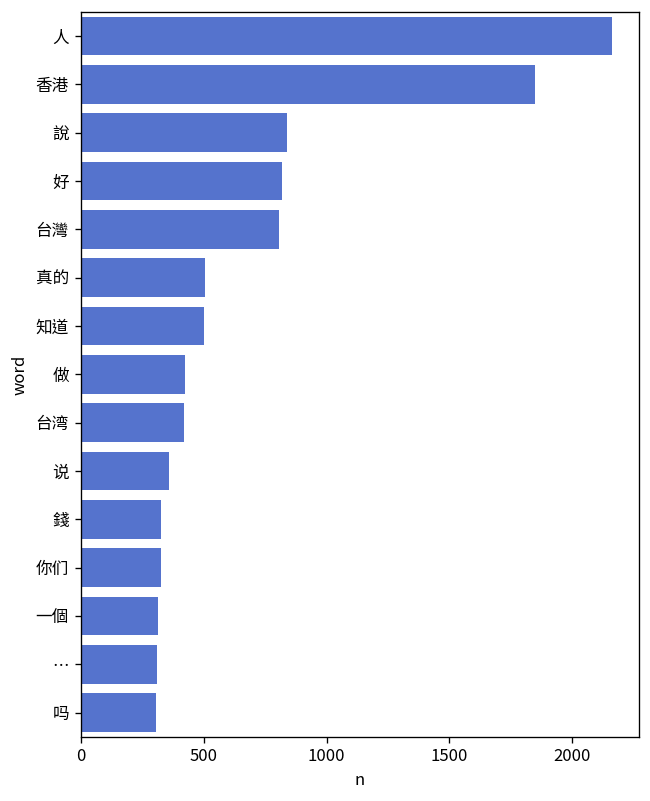

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8), dpi=120) 
df_data = df_tmp.sort_values('n', ascending=False)
#     print(df_data)
sns.barplot(x='n', 
            y='word', 
            data=df_data, 
            label='word', 
            color='royalblue',
            )